#                               House Price Prediction in King County

![image info](./images/high-angle-view-of-suburban-houses-ip-galanternik-du.png)

## Overview

This project focus on predicting the house price given various factors affecting the price. It involves investigation of house sales in the King County area and building a multiple linear regression model to predict the sale price.


## Business Problem

Homeowners approaches the real estate agency for help in order to buy /sell their homes. The business problem that we could focus on for the real estate agency is the need to provide advice to homeowners about home renovations that might increase the estimated value of their homes, and by what amount.\
In this project we are providing the prediction data to the real estate agency for homeowners who wants to buy homes. It focus on the factors that increases the house price that might be negotiated while purchasing new homes.


## Approach and methodology

In this project we are following OSEMN data science workflow. It contains:
* Obtain (Generate data)
* Scrub (extracting columns,handling missing values)
* Explore (understanding data and create visualization)
* Model (building regression model)
* Interpret (communicating results)

## OBTAIN

In [1]:
# import all the needed packages
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('seaborn')
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler

Load the csv file into a dataframe

In [2]:
df = pd.read_csv('data/kc_house_data.csv')

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


## SCRUB

This involes extracting columns and cleaning data.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [5]:
# convert 'date' to datetime object.
df['date'] = df.date.apply(pd.Timestamp)

In [6]:
df['date']

0       2014-10-13
1       2014-12-09
2       2015-02-25
3       2014-12-09
4       2015-02-18
           ...    
21592   2014-05-21
21593   2015-02-23
21594   2014-06-23
21595   2015-01-16
21596   2014-10-15
Name: date, Length: 21597, dtype: datetime64[ns]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null datetime64[ns]
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: datetime64[ns](1), float64(8), int64(11), object(1)
memory 

Few columns have null values.

In [8]:
# checking for null values in watefront column
df['waterfront'].isna().any()

True

In [9]:
df['waterfront'].unique()

array([nan,  0.,  1.])

In [10]:
df['waterfront'].isna().sum()/len(df['waterfront'])

0.11001527989998611

Since null value contributes 11%, we will consider it has 0 (no waterfront)

In [11]:
# Replacing the null values with '0'
df['waterfront'].fillna(0, inplace=True)

In [12]:
df['waterfront'].unique()

array([0., 1.])

In [13]:
df['view'].isna().any()

True

In [14]:
df['view'].unique()

array([ 0., nan,  3.,  4.,  2.,  1.])

In [15]:
# Replacing the null values with '0'
df['view'].fillna(0, inplace = True)

In [16]:
df['view'].unique()

array([0., 3., 4., 2., 1.])

In [17]:
df['condition'].unique()

array([3, 5, 4, 1, 2])

In [18]:
df['grade'].unique()

array([ 7,  6,  8, 11,  9,  5, 10, 12,  4,  3, 13])

In [19]:
df['yr_renovated'].isna().any()

True

In [20]:
# Replacing the null values with '0'
df['yr_renovated'].fillna(0, inplace = True)

In [21]:
df['yr_renovated'].unique()

array([   0., 1991., 2002., 2010., 1992., 2013., 1994., 1978., 2005.,
       2003., 1984., 1954., 2014., 2011., 1983., 1945., 1990., 1988.,
       1977., 1981., 1995., 2000., 1999., 1998., 1970., 1989., 2004.,
       1986., 2007., 1987., 2006., 1985., 2001., 1980., 1971., 1979.,
       1997., 1950., 1969., 1948., 2009., 2015., 1974., 2008., 1968.,
       2012., 1963., 1951., 1962., 1953., 1993., 1996., 1955., 1982.,
       1956., 1940., 1976., 1946., 1975., 1964., 1973., 1957., 1959.,
       1960., 1967., 1965., 1934., 1972., 1944., 1958.])

In [22]:
df['sqft_basement'].dtype

dtype('O')

'sqft_basement' column is in object and needs to be converted to float.

In [23]:
df['sqft_basement'].unique()

array(['0.0', '400.0', '910.0', '1530.0', '?', '730.0', '1700.0', '300.0',
       '970.0', '760.0', '720.0', '700.0', '820.0', '780.0', '790.0',
       '330.0', '1620.0', '360.0', '588.0', '1510.0', '410.0', '990.0',
       '600.0', '560.0', '550.0', '1000.0', '1600.0', '500.0', '1040.0',
       '880.0', '1010.0', '240.0', '265.0', '290.0', '800.0', '540.0',
       '710.0', '840.0', '380.0', '770.0', '480.0', '570.0', '1490.0',
       '620.0', '1250.0', '1270.0', '120.0', '650.0', '180.0', '1130.0',
       '450.0', '1640.0', '1460.0', '1020.0', '1030.0', '750.0', '640.0',
       '1070.0', '490.0', '1310.0', '630.0', '2000.0', '390.0', '430.0',
       '850.0', '210.0', '1430.0', '1950.0', '440.0', '220.0', '1160.0',
       '860.0', '580.0', '2060.0', '1820.0', '1180.0', '200.0', '1150.0',
       '1200.0', '680.0', '530.0', '1450.0', '1170.0', '1080.0', '960.0',
       '280.0', '870.0', '1100.0', '460.0', '1400.0', '660.0', '1220.0',
       '900.0', '420.0', '1580.0', '1380.0', '475.0', 

In [24]:
df['sqft_basement'].str.contains(' ?')


0        True
1        True
2        True
3        True
4        True
         ... 
21592    True
21593    True
21594    True
21595    True
21596    True
Name: sqft_basement, Length: 21597, dtype: bool

In [25]:
# replacing the string character to 0 and converting to float
df['sqft_basement'] = df['sqft_basement'].replace('?', 0).astype(float)

In [26]:
df['sqft_basement'].unique()

array([   0.,  400.,  910., 1530.,  730., 1700.,  300.,  970.,  760.,
        720.,  700.,  820.,  780.,  790.,  330., 1620.,  360.,  588.,
       1510.,  410.,  990.,  600.,  560.,  550., 1000., 1600.,  500.,
       1040.,  880., 1010.,  240.,  265.,  290.,  800.,  540.,  710.,
        840.,  380.,  770.,  480.,  570., 1490.,  620., 1250., 1270.,
        120.,  650.,  180., 1130.,  450., 1640., 1460., 1020., 1030.,
        750.,  640., 1070.,  490., 1310.,  630., 2000.,  390.,  430.,
        850.,  210., 1430., 1950.,  440.,  220., 1160.,  860.,  580.,
       2060., 1820., 1180.,  200., 1150., 1200.,  680.,  530., 1450.,
       1170., 1080.,  960.,  280.,  870., 1100.,  460., 1400.,  660.,
       1220.,  900.,  420., 1580., 1380.,  475.,  690.,  270.,  350.,
        935., 1370.,  980., 1470.,  160.,  950.,   50.,  740., 1780.,
       1900.,  340.,  470.,  370.,  140., 1760.,  130.,  520.,  890.,
       1110.,  150., 1720.,  810.,  190., 1290.,  670., 1800., 1120.,
       1810.,   60.,

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null datetime64[ns]
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null float64
view             21597 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null float64
yr_built         21597 non-null int64
yr_renovated     21597 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: datetime64[ns](1), float64(9), int64(11)
memory usage: 3.5

In [28]:
# converting zipcode from integer to string
df['zipcode'] = df['zipcode'].astype(str)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null datetime64[ns]
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null float64
view             21597 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null float64
yr_built         21597 non-null int64
yr_renovated     21597 non-null float64
zipcode          21597 non-null object
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: datetime64[ns](1), float64(9), int64(10), object(1)
memor

## Explore

Let's create visualization and check the distribution each columns

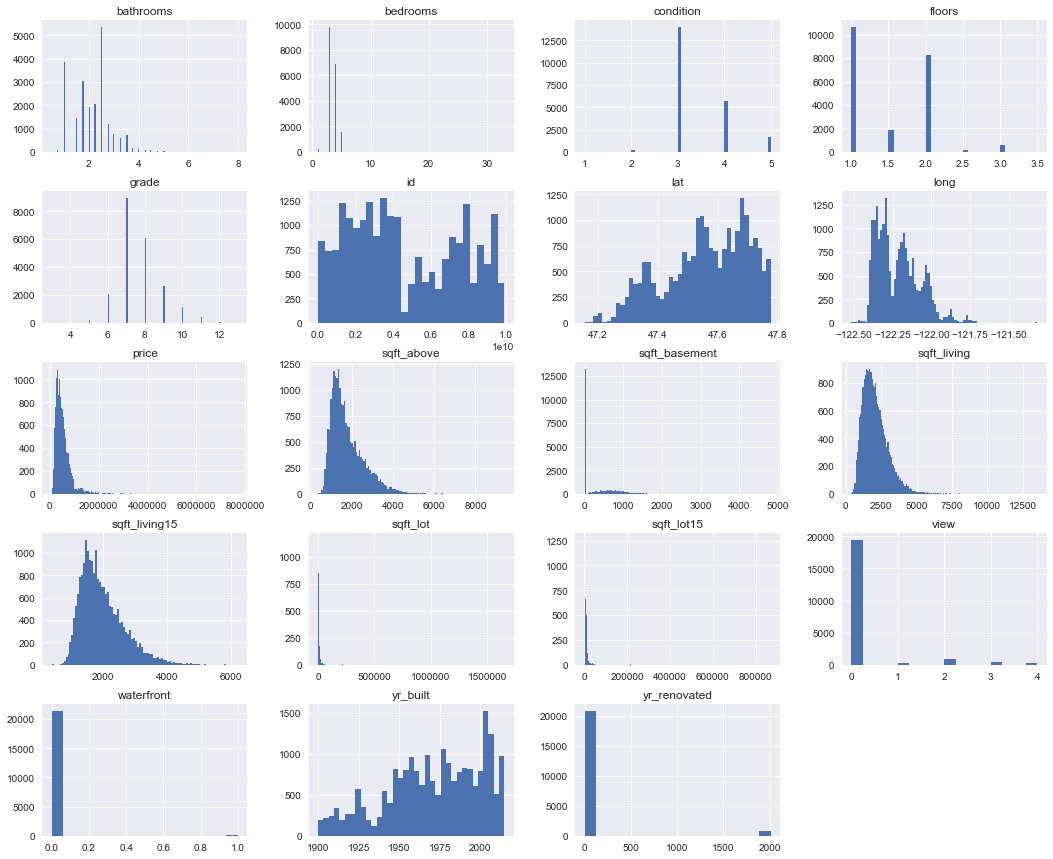

In [30]:
# create histogram for each column
df.hist(figsize = (18, 15), bins = 'auto');

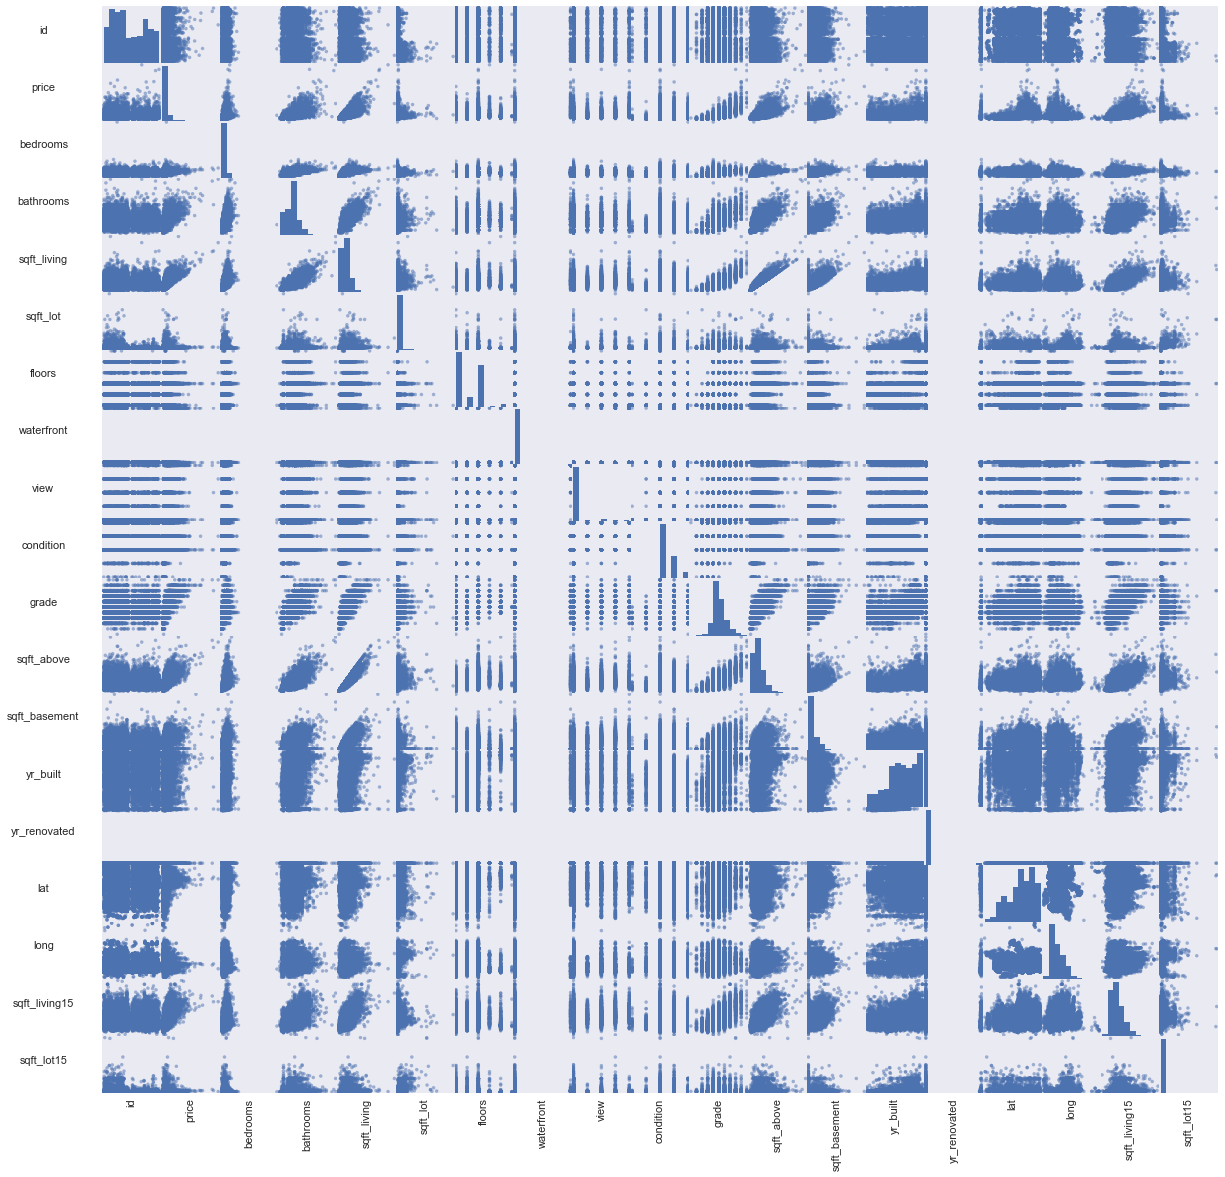

In [31]:
# create scatter plot for each column
sm = pd.plotting.scatter_matrix(df, figsize = [20, 20]);

# Rotates the text
[s.xaxis.label.set_rotation(90) for s in sm.reshape(-1)]
[s.yaxis.label.set_rotation(0) for s in sm.reshape(-1)]

#May need to offset label when rotating to prevent overlap of figure
[s.get_yaxis().set_label_coords(-1, 0.5) for s in sm.reshape(-1)]

#Hide all ticks
[s.set_xticks(()) for s in sm.reshape(-1)]
[s.set_yticks(()) for s in sm.reshape(-1)]

plt.show()

In [32]:
# removing 'id' column 
df.drop('id', axis = 1, inplace = True)

Let us plot heat map to check for the multicolinearity

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.264306,0.393497,0.036056,0.667951,0.605368,0.321108,0.053953,0.117855,0.306692,0.022036,0.585241,0.082845
bedrooms,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,0.002127,0.078354,0.026496,0.356563,0.479386,0.297229,0.155670,0.017900,0.009951,0.132054,0.393406,0.030690
bathrooms,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.063629,0.186016,0.126479,0.665838,0.686668,0.278485,0.507173,0.047177,0.024280,0.224903,0.569884,0.088303
sqft_living,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.104637,0.281715,0.059445,0.762779,0.876448,0.428660,0.318152,0.051060,0.052155,0.241214,0.756402,0.184342
sqft_lot,0.089876,0.032471,0.088373,0.173453,1.000000,0.004814,0.021459,0.075054,0.008830,0.114731,0.184139,0.015031,0.052946,0.004979,0.085514,0.230227,0.144763,0.718204
floors,0.256804,0.177944,0.502582,0.353953,0.004814,1.000000,0.020797,0.028414,0.264075,0.458794,0.523989,0.241866,0.489193,0.003793,0.049239,0.125943,0.280102,0.010722
waterfront,0.264306,0.002127,0.063629,0.104637,0.021459,0.020797,1.000000,0.380543,0.016648,0.082818,0.071778,0.083050,0.024487,0.073939,0.012157,0.037628,0.083823,0.030658
view,0.393497,0.078354,0.186016,0.281715,0.075054,0.028414,0.380543,1.000000,0.045622,0.249082,0.166017,0.270629,0.054452,0.090339,0.006321,0.077702,0.278928,0.073083
condition,0.036056,0.026496,0.126479,0.059445,0.008830,0.264075,0.016648,0.045622,1.000000,0.146896,0.158904,0.168482,0.361592,0.055808,0.015102,0.105877,0.093072,0.003126
grade,0.667951,0.356563,0.665838,0.762779,0.114731,0.458794,0.082818,0.249082,0.146896,1.000000,0.756073,0.165843,0.447865,0.015623,0.113575,0.200341,0.713867,0.120981


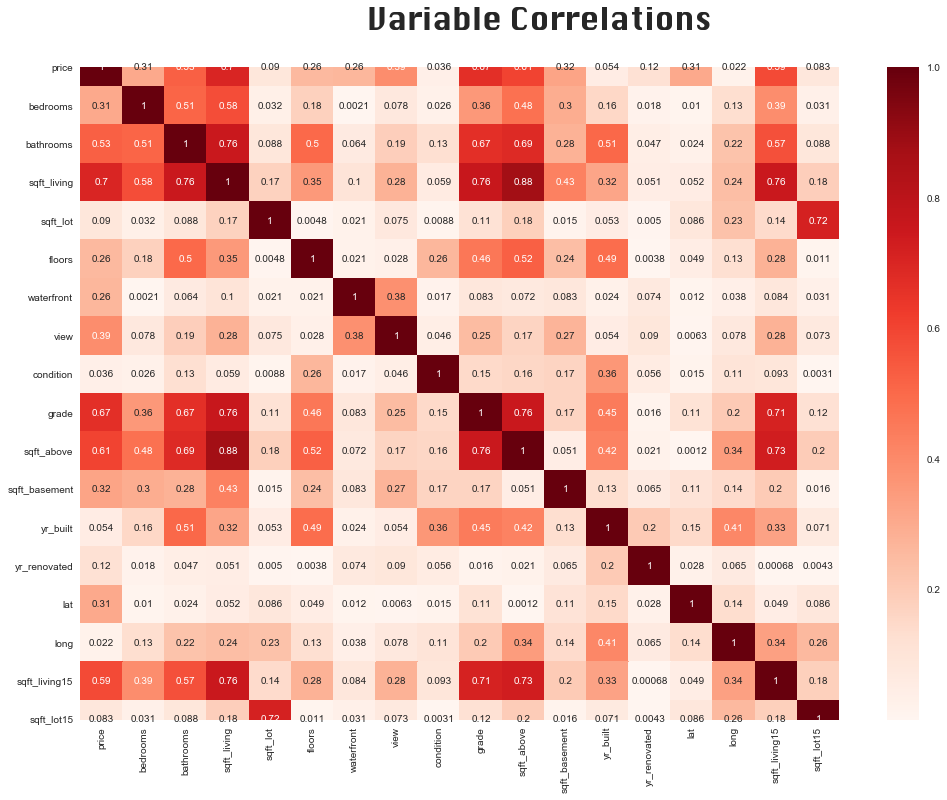

In [33]:
# heat map
corr = df.corr().abs()
fig, ax = plt.subplots(figsize = (17, 12))
fig.suptitle('Variable Correlations', fontsize = 30, y = .95, fontname = 'Silom')
heatmap = sns.heatmap(corr, cmap = 'Reds', annot = True)
corr



In [34]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

Based on the heat map, I have taken few columns which is having linear property with the 'price'

In [35]:
df1 = df[['sqft_living', 'grade', 'sqft_lot', 'sqft_above', 'sqft_living15', 'view', 'bathrooms', 'bedrooms']]

## Model

Now let's create a baseline multiple linear regression model with the selected columns. Here we are using the Scikit learn model for our project.

### Model 1

In [36]:
# splitting the data into train and test 
X = df1
y = df['price']

Now using the scikit learn transform the data into train and test data with 75% of training data and 25% of test data

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

Let's define a function for linear regression to scale,transform,fit and predict the 'Root mean squared error' and 'R-squared value'

In [38]:
# Linear regression function
def linear_model(X_train, y_train, X_test, y_test):
    """
    Function to build linear regression model
    Step 1: Scaling data
    Step 2: Initializing regression class
    Step 3: fitting the model
    Step 4: predicting values
    Step 5: Calculating RMSE and R2 value
    Step 6: Plotting regression graph
    """
#   Scaling the data
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)
#   Create model 
    lr = LinearRegression()
#   Fit the train data in the model
    lr.fit(X_train_scaled, y_train)
#   Predict the train and test data
    train_pred = lr.predict(X_train_scaled)
    test_pred = lr.predict(X_test_scaled)
#   Finding RMSE value for the train and test data
    train_rmse = np.sqrt(mean_squared_error(y_train, (train_pred)))
    test_rmse = np.sqrt(mean_squared_error(y_test, (test_pred)))
    print("Train RMSE: "+ str(train_rmse))
    print("Test RMSE: "+ str(test_rmse))
#   Finding the R2 value for the train and test data  
    train_r_squared = r2_score(y_train, train_pred)
    test_r_squared = r2_score(y_test, test_pred)
    print("Train R2: "+ str(train_r_squared))
    print("Test R2: "+ str(test_r_squared))
    sns.regplot(x=  test_pred, y = y_test, scatter_kws={"s":10}, line_kws={"color": "green"})
#     ax.set(xlabel="Prediction_Price", ylabel = "Actual_Price")
    plt.xlabel("Prediction_Price")
    plt.ylabel("Actual_Price")
    plt.title("Model Regression Plot")
    plt.savefig('./images/Model.png', dpi=300, bbox_inches='tight')
    

Train RMSE: 236467.87482500693
Test RMSE: 242081.30788978518
Train R2: 0.5833310228392444
Test R2: 0.5728609089897383


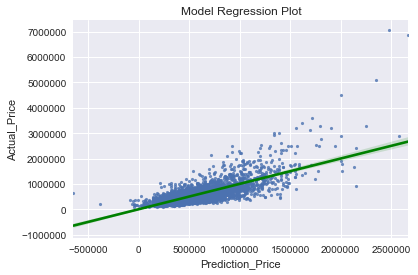

In [39]:
linear_model(X_train,y_train,X_test,y_test)

Multiple Linear Regression Assumptions:
* No multicollinearity
* No heteroscedasticity
* No non linear relationship between target and response variable
* No normality checks

In [40]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
train_pred = lr.predict(X_train_scaled)
test_pred = lr.predict(X_test_scaled)

In [41]:
# Calculating train and test data residuals
residuals_train = y_train - train_pred
residuals_test = y_test - test_pred


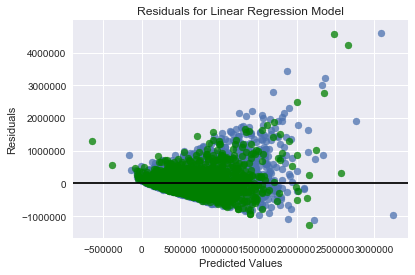

In [42]:
# heteroscedasticity check
plt.scatter(train_pred, residuals_train, alpha = .75)
plt.scatter(test_pred, residuals_test, color = 'g', alpha = .75)
plt.axhline(y = 0, color = 'black')
plt.title('Residuals for Linear Regression Model')
plt.ylabel('Residuals')
plt.xlabel('Predicted Values')
plt.show()

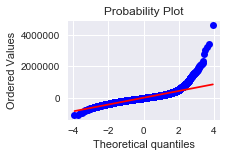

In [43]:
# QQ-plot to check for the normal distribution.
ax1 = plt.subplot(221)
res = stats.probplot(residuals_train, plot = plt)

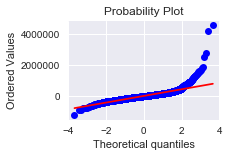

In [44]:
ax2 = plt.subplot(222)
res = stats.probplot(residuals_test, plot=plt)

Our baseline model is heteroscedastic and not normally distributed. hence we need to improve our model to satisfy the linear regression assumptions.

### Model 2

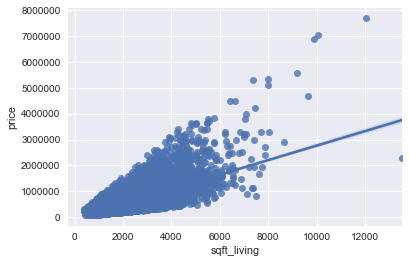

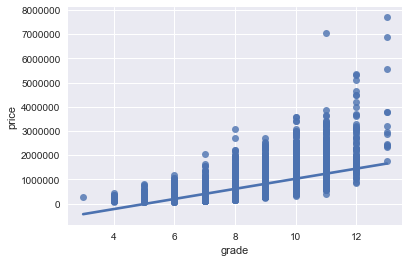

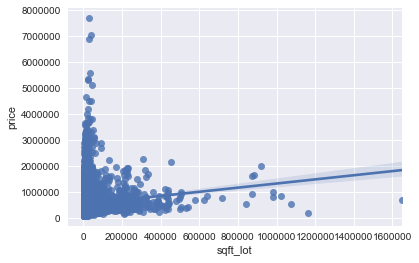

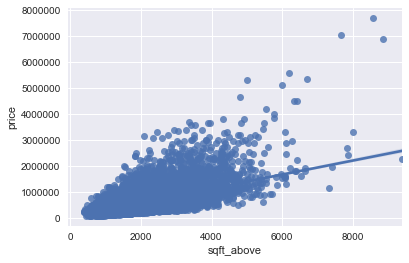

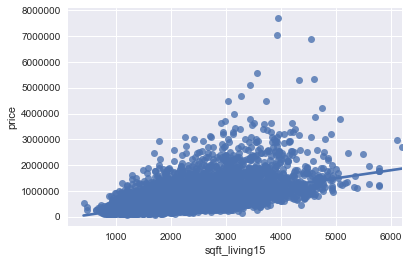

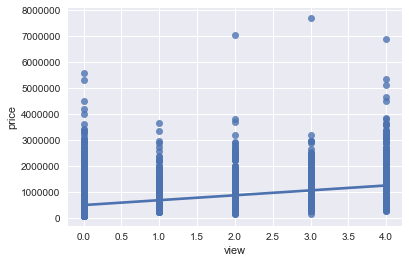

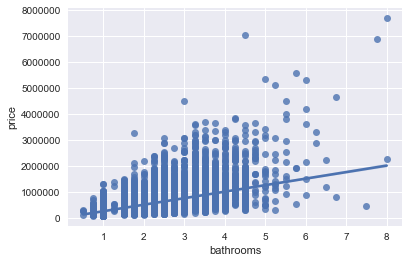

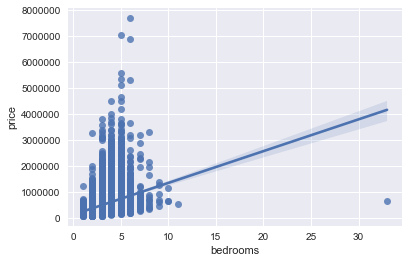

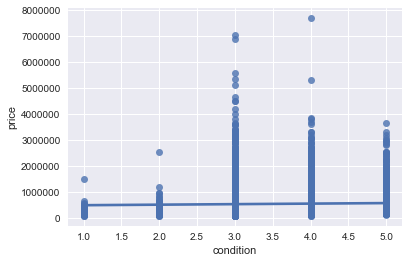

In [45]:
# Based on the strenth of the correlation ,I have chosen few columns
df2 = df[['price', 'sqft_living', 'grade', 'sqft_lot', 'sqft_above', 'sqft_living15', 'view', 'bathrooms', 'bedrooms', 'condition']]
y = df2['price']
X = df2.drop(['price'], axis = 1)
for val in X.columns:
    sns.regplot(x = val, y = 'price', data = df2); 
    plt.show()
     

On seeing the graph above, Let us select the column that are linear with price

In [46]:
df3 = df[['sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'view', 'bathrooms', 'price']]

Splitting our train and test data

In [47]:
y = df3['price']
X = df3.drop('price',axis = 1)


In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

Train RMSE: 238114.36314309336
Test RMSE: 243234.25014980324
Train R2: 0.5775084222015455
Test R2: 0.568782614551135


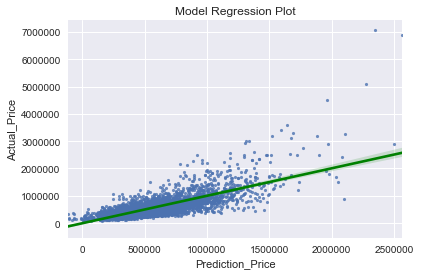

In [49]:
linear_model(X_train, y_train, X_test, y_test)

Comparing our model with the baseline model

**Model 1**:
* **Train RMSE**: 236467.87482500693
* **Test RMSE**: 242081.30788978518
* **Train R2**: 0.5833310228392444
* **Test R2**: 0.5728609089897383


**Model 2**:
* **Train RMSE**: 238114.36314309336
* **Test RMSE**: 243234.25014980324
* **Train R2**: 0.5775084222015455
* **Test R2**: 0.568782614551135

Our model 2 didn't improve well. 

### Model 3

Let's check our continuous variable and do log transformation to improve our model futher.

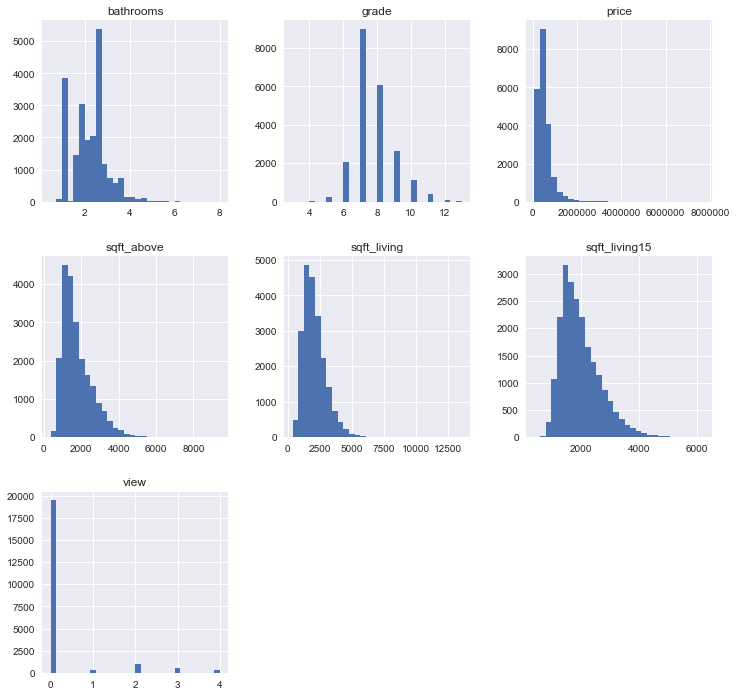

In [50]:
# Histogram to check the continuous variable
df3.hist(figsize = (12, 12), bins = 30);

Our graph clearly shows that the values are skewed. Hence doing log transformation

In [51]:
# Taking the continous variable 
continuous = ['sqft_above', 'sqft_living', 'sqft_living15', 'price']

In [52]:
# Log transform and normalize
df_cont = df3[continuous]

# log features
log_names = [f'{column}_log' for column in df_cont.columns]

df_log = np.log(df_cont)
df_log.columns = log_names

In [53]:
df_log

,sqft_above_log,sqft_living_log,sqft_living15_log,price_log
0,7.073270,7.073270,7.200425,12.309982
1,7.682482,7.851661,7.432484,13.195614
2,6.646391,6.646391,7.908387,12.100712
3,6.956545,7.580700,7.215240,13.311329
4,7.426549,7.426549,7.495542,13.142166
...,...,...,...,...
21592,7.333023,7.333023,7.333023,12.793859
21593,7.745003,7.745003,7.512071,12.899220
21594,6.927558,6.927558,6.927558,12.904459
21595,7.377759,7.377759,7.251345,12.899220


In [54]:
# concatenating the log transformed variable with our dataframe
df4 = pd.concat([df_log, df3], axis = 1)

In [55]:
df4

,sqft_above_log,sqft_living_log,sqft_living15_log,price_log,sqft_living,grade,sqft_above,sqft_living15,view,bathrooms,price
0,7.073270,7.073270,7.200425,12.309982,1180,7,1180,1340,0.0,1.00,221900.0
1,7.682482,7.851661,7.432484,13.195614,2570,7,2170,1690,0.0,2.25,538000.0
2,6.646391,6.646391,7.908387,12.100712,770,6,770,2720,0.0,1.00,180000.0
3,6.956545,7.580700,7.215240,13.311329,1960,7,1050,1360,0.0,3.00,604000.0
4,7.426549,7.426549,7.495542,13.142166,1680,8,1680,1800,0.0,2.00,510000.0
...,...,...,...,...,...,...,...,...,...,...,...
21592,7.333023,7.333023,7.333023,12.793859,1530,8,1530,1530,0.0,2.50,360000.0
21593,7.745003,7.745003,7.512071,12.899220,2310,8,2310,1830,0.0,2.50,400000.0
21594,6.927558,6.927558,6.927558,12.904459,1020,7,1020,1020,0.0,0.75,402101.0
21595,7.377759,7.377759,7.251345,12.899220,1600,8,1600,1410,0.0,2.50,400000.0


In [56]:
# Removing the unlogged column 
df4.drop(['sqft_living', 'sqft_above', 'sqft_living15', 'price'], axis = 1, inplace = True)

In [57]:
df4

,sqft_above_log,sqft_living_log,sqft_living15_log,price_log,grade,view,bathrooms
0,7.073270,7.073270,7.200425,12.309982,7,0.0,1.00
1,7.682482,7.851661,7.432484,13.195614,7,0.0,2.25
2,6.646391,6.646391,7.908387,12.100712,6,0.0,1.00
3,6.956545,7.580700,7.215240,13.311329,7,0.0,3.00
4,7.426549,7.426549,7.495542,13.142166,8,0.0,2.00
...,...,...,...,...,...,...,...
21592,7.333023,7.333023,7.333023,12.793859,8,0.0,2.50
21593,7.745003,7.745003,7.512071,12.899220,8,0.0,2.50
21594,6.927558,6.927558,6.927558,12.904459,7,0.0,0.75
21595,7.377759,7.377759,7.251345,12.899220,8,0.0,2.50


Checking our data after log transformation

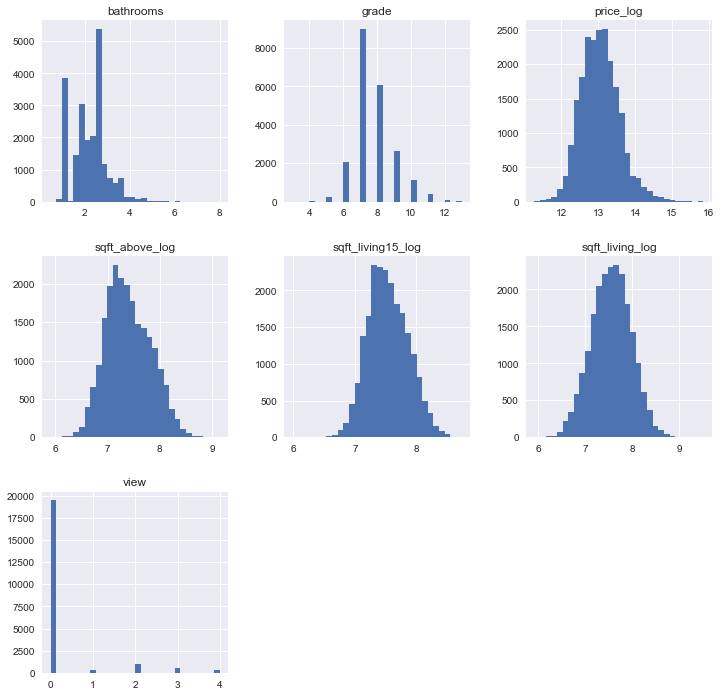

In [58]:
# histogram plot
df4.hist(figsize = (12, 12), bins = 30);

Now our data looks way normal from skewed data after log transformation

In [59]:
# Splitting the train and test data
X = df4.drop('price_log', axis = 1)
y = df4['price_log']

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

Train RMSE: 0.3417654821862211
Test RMSE: 0.34131400565596115
Train R2: 0.5800369077132734
Test R2: 0.575725504061078


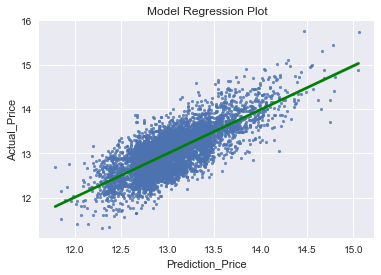

In [61]:
linear_model(X_train, y_train, X_test, y_test)

Comparing our model with the baseline model

**Model 2**:
* **Train RMSE**: 238114.36314309336
* **Test RMSE**: 243234.25014980324
* **Train R2**: 0.5775084222015455
* **Test R2**: 0.568782614551135


**Model 3**:
* **Train RMSE**: 0.3417654821862211
* **Test RMSE**: 0.34131400565596115
* **Train R2**: 0.5800369077132734
* **Test R2**: 0.575725504061078


Our model 3 improved well on RMSE value but the R squared value improved but let us try improving the model with better R squared value 

### Model 4

Checking for the muliticollinearity to improve our model

In [62]:
df4.corr()

,sqft_above_log,sqft_living_log,sqft_living15_log,price_log,grade,view,bathrooms
sqft_above_log,1.000000,0.864979,0.713102,0.586013,0.742869,0.157019,0.695839
sqft_living_log,0.864979,1.000000,0.746836,0.674802,0.743038,0.244804,0.762135
sqft_living15_log,0.713102,0.746836,1.000000,0.607154,0.689054,0.262556,0.571796
price_log,0.586013,0.674802,0.607154,1.000000,0.703720,0.344653,0.551249
grade,0.742869,0.743038,0.689054,0.703720,1.000000,0.249082,0.665838
view,0.157019,0.244804,0.262556,0.344653,0.249082,1.000000,0.186016
bathrooms,0.695839,0.762135,0.571796,0.551249,0.665838,0.186016,1.000000


,sqft_above_log,sqft_living_log,sqft_living15_log,price_log,grade,view,bathrooms
sqft_above_log,1.000000,0.864979,0.713102,0.586013,0.742869,0.157019,0.695839
sqft_living_log,0.864979,1.000000,0.746836,0.674802,0.743038,0.244804,0.762135
sqft_living15_log,0.713102,0.746836,1.000000,0.607154,0.689054,0.262556,0.571796
price_log,0.586013,0.674802,0.607154,1.000000,0.703720,0.344653,0.551249
grade,0.742869,0.743038,0.689054,0.703720,1.000000,0.249082,0.665838
view,0.157019,0.244804,0.262556,0.344653,0.249082,1.000000,0.186016
bathrooms,0.695839,0.762135,0.571796,0.551249,0.665838,0.186016,1.000000


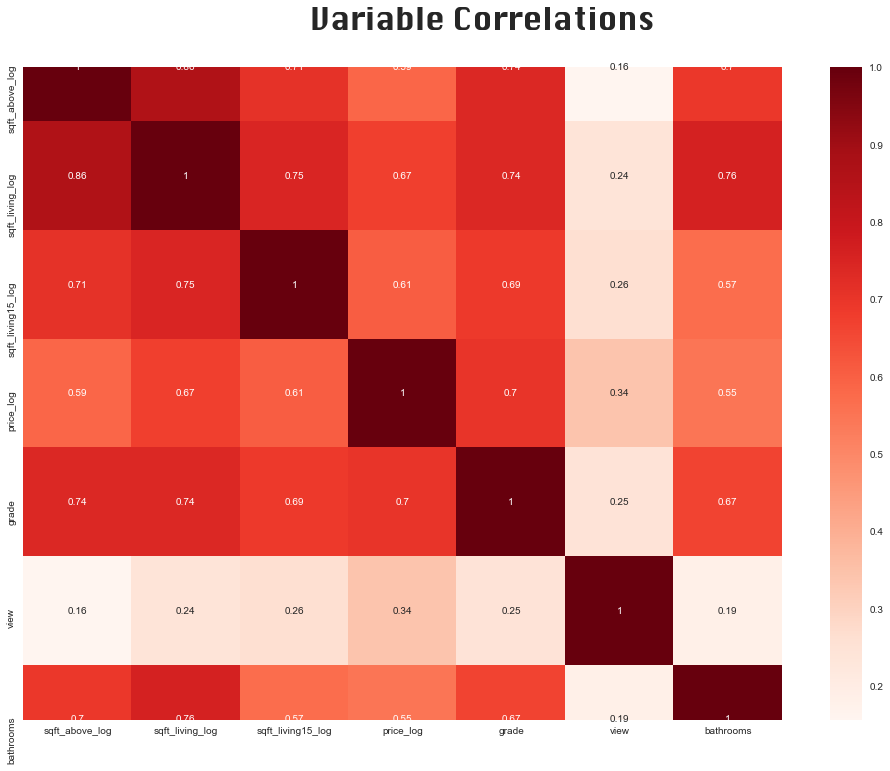

In [63]:
corr = df4.corr().abs()
fig, ax = plt.subplots(figsize = (17, 12))
fig.suptitle('Variable Correlations', fontsize = 30, y = .95, fontname = 'Silom')
heatmap = sns.heatmap(corr, cmap = 'Reds', annot = True)
corr

From our heat map,'sqft_living_log' is highly collinear .hence removing it.

In [64]:
X = df4.drop(['price_log','sqft_living_log'], axis = 1)
y = df4['price_log']

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)


Train RMSE: 0.3513999392706709
Test RMSE: 0.35286466512965453
Train R2: 0.5560254312136382
Test R2: 0.5465232245990275


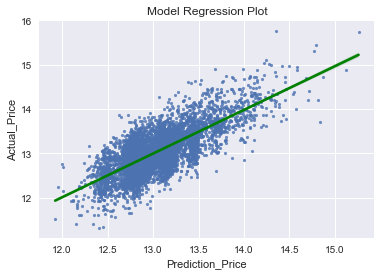

In [66]:
linear_model(X_train, y_train, X_test, y_test)

Comparing our model with the baseline model

**Model 3**:
* **Train RMSE**: 0.3417654821862211
* **Test RMSE**: 0.34131400565596115
* **Train R2**: 0.5800369077132734
* **Test R2**: 0.575725504061078


**Model 4**:
* **Train RMSE**: 0.3513999392706709
* **Test RMSE**: 0.35286466512965453
* **Train R2**: 0.5560254312136382
* **Test R2**: 0.5465232245990275

 Our model R2 square value is reduced by small amount . 

### Model 5

In [67]:
categorical=['bathrooms']

In [68]:
bathroom_df = np.asarray(df4[['bathrooms']]).reshape(len(df4[['bathrooms']]))

In [69]:
df5=df4[bathroom_df <= 4]

In [70]:
df5

,sqft_above_log,sqft_living_log,sqft_living15_log,price_log,grade,view,bathrooms
0,7.073270,7.073270,7.200425,12.309982,7,0.0,1.00
1,7.682482,7.851661,7.432484,13.195614,7,0.0,2.25
2,6.646391,6.646391,7.908387,12.100712,6,0.0,1.00
3,6.956545,7.580700,7.215240,13.311329,7,0.0,3.00
4,7.426549,7.426549,7.495542,13.142166,8,0.0,2.00
...,...,...,...,...,...,...,...
21592,7.333023,7.333023,7.333023,12.793859,8,0.0,2.50
21593,7.745003,7.745003,7.512071,12.899220,8,0.0,2.50
21594,6.927558,6.927558,6.927558,12.904459,7,0.0,0.75
21595,7.377759,7.377759,7.251345,12.899220,8,0.0,2.50


In [71]:
df_cate=pd.get_dummies(df5,columns=categorical,drop_first=True)

In [72]:
X=df_cate.drop(['price_log'],axis=1)
y=df_cate['price_log']

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

Train RMSE: 0.33420217863454416
Test RMSE: 0.34145241899517415
Train R2: 0.5668054800701774
Test R2: 0.5687840686619469


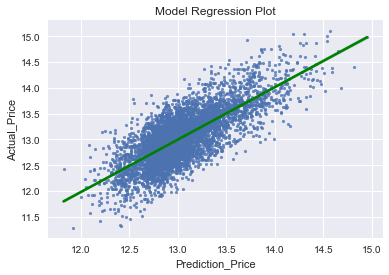

In [74]:
linear_model(X_train, y_train, X_test, y_test)

**Model 4**:
* **Train RMSE**: 0.3513999392706709
* **Test RMSE**: 0.35286466512965453
* **Train R2**: 0.5560254312136382
* **Test R2**: 0.5465232245990275


**Model 5**:
* **Train RMSE**: 0.33420217863454416
* **Test RMSE**: 0.34145241899517415
* **Train R2**: 0.5668054800701774
* **Test R2**: 0.5687840686619469


There is no big difference in our R2 and RMSE value and hence I am removing the categorical terms.

### Model 6

In our dataset we have 'yr_built', 'yr_renovated' and 'grade' column. Let us check if the house built year and the year renovated has any impact on the price 

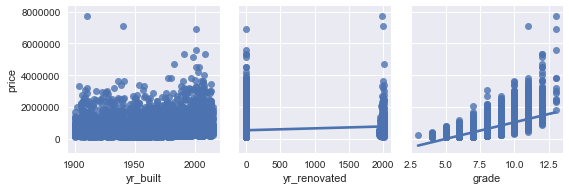

In [75]:
sns.pairplot(df, x_vars = ['yr_built', 'yr_renovated','grade'], y_vars = 'price', kind = 'reg');

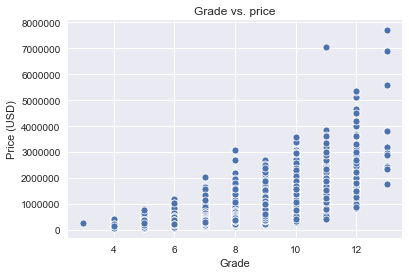

In [76]:
sns.scatterplot(x = df['grade'], y = df['price'], data = df)
plt.title('Grade vs. price')
plt.xlabel('Grade')
plt.ylabel('Price (USD)')
plt.show()

As the grade increases, price value of the house increases.

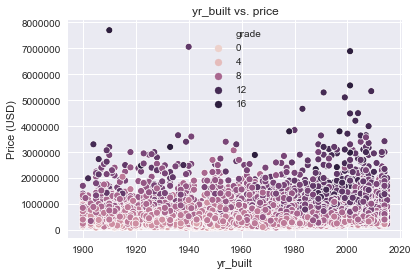

In [77]:
# # Scatter plot of sqft living vs price with hue grade
sns.scatterplot(x = df['yr_built'], y = df['price'], hue = df['grade'],data = df)
plt.title('yr_built vs. price')
plt.xlabel('yr_built')
plt.ylabel('Price (USD)')
plt.show()

From the scatter plot above it's clear that the recently built house has higher grade and hence increase in the price value.

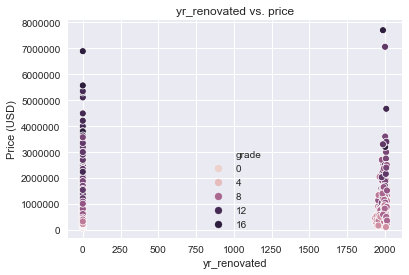

In [78]:
sns.scatterplot(x = df['yr_renovated'], y = df['price'], hue = df['grade'], data = df)
plt.title('yr_renovated vs. price')
plt.xlabel('yr_renovated')
plt.ylabel('Price (USD)')
plt.show()

Comparing both the graph above, I am finding the interaction between the 'yr_built and 'price'

In [79]:
df.sort_values('yr_built', ascending = True)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
14069,2014-07-28,255500.0,4,1.00,1370,41194,1.5,0.0,2.0,5,5,1370,0.0,1900,0.0,98092,47.2716,-122.144,1590,84070
14783,2014-10-23,560000.0,4,1.00,1360,5814,1.5,0.0,0.0,2,6,1360,0.0,1900,0.0,98122,47.6038,-122.314,1010,5814
10973,2015-04-15,730000.0,3,1.75,1650,5000,1.5,0.0,0.0,4,8,1650,0.0,1900,0.0,98107,47.6743,-122.371,1630,5000
115,2014-11-21,740500.0,3,3.50,4380,6350,2.0,0.0,0.0,3,8,2780,0.0,1900,0.0,98117,47.6981,-122.368,1830,6350
4693,2014-06-10,558000.0,4,2.00,2180,3870,1.0,0.0,0.0,3,7,1020,1160.0,1900,0.0,98122,47.6089,-122.303,1520,2580
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20235,2015-05-05,771005.0,5,4.50,4000,6713,2.0,0.0,0.0,3,9,4000,0.0,2015,0.0,98024,47.5254,-121.886,3690,6600
7519,2014-12-31,614285.0,5,2.75,2730,6401,2.0,0.0,0.0,3,8,2730,0.0,2015,0.0,98072,47.7685,-122.160,2520,6126
14911,2015-04-21,671000.0,4,2.75,1890,1475,2.0,0.0,0.0,3,9,1200,690.0,2015,0.0,98199,47.6472,-122.383,1650,1682
4150,2015-04-22,631000.0,3,2.25,1670,1396,2.0,0.0,0.0,3,9,1250,420.0,2015,0.0,98115,47.6814,-122.288,1610,5191


In [80]:
# creating a dictionary to generate new dataframe for each grade category
uniquenames = df.grade.unique()
gradedict = {val : pd.DataFrame() for val in uniquenames}
for key in gradedict.keys():
    gradedict[key] = df[:][df.grade == key]

In [81]:
gradedict[7]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
6,2014-06-27,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,3,7,1715,0.0,1995,0.0,98003,47.3097,-122.327,2238,6819
7,2015-01-15,291850.0,3,1.50,1060,9711,1.0,0.0,0.0,3,7,1060,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21567,2014-06-10,399950.0,2,1.00,710,1157,2.0,0.0,0.0,4,7,710,0.0,1943,0.0,98102,47.6413,-122.329,1370,1173
21568,2014-12-02,380000.0,3,2.50,1260,900,2.0,0.0,0.0,3,7,940,320.0,2007,0.0,98116,47.5621,-122.384,1310,1415
21569,2014-08-28,270000.0,3,2.50,1870,5000,2.0,0.0,0.0,3,7,1870,0.0,2009,0.0,98042,47.3339,-122.055,2170,5399
21594,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,3,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007


In [82]:
# selecting yr_built column from each grade dataframe
uniquenames = df.grade.unique()    
yr_builtdict = {val : gradedict[val].yr_built.values.reshape(-1, 1) for val in uniquenames}


In [83]:
yr_builtdict[7]

array([[1955],
       [1951],
       [1965],
       ...,
       [2009],
       [2009],
       [2008]])

In [84]:
# creating list for linear regression
reg_list = ['regression_3', 'regression_4', 'regression_5', 'regression_6', 'regression_7', 'regression_8', 'regression_9', 'regression_10', 'regression_11', 'regression_12', 'regression_13']


In [85]:
# creating a dictionary to initialize linear regression for each grade value
uniquenames=df.grade.unique()
reg_dict = {val : LinearRegression() for val in uniquenames}

In [86]:
reg_dict

{7: LinearRegression(),
 6: LinearRegression(),
 8: LinearRegression(),
 11: LinearRegression(),
 9: LinearRegression(),
 5: LinearRegression(),
 10: LinearRegression(),
 12: LinearRegression(),
 4: LinearRegression(),
 3: LinearRegression(),
 13: LinearRegression()}

In [87]:
# function for creating the model
def linearRegression(list_):
    """
    Initializing regression class to each unique grade values
    """
    for num in list_:
        reg_dict = {val : LinearRegression() for val in list_}
    return reg_dict

In [88]:
# function to fit our regression model
def model_fit(list_):
    """
    Fitting the model to each grade regression model
    """
    for num in list_:
        val = reg_dict[num].fit(yr_builtdict[num], gradedict[num].price)
    return val

In [89]:
# function to predict our regression model
def model_predict(list_):
    """
    Predicting the model value for each grade
    """
    for num in list_:
        val1 = reg_dict[num].predict(yr_builtdict[num])
    return val1


In [90]:
# function to find coefficient of the model
def model_coef(list_):
    """
    Calculating the model parameters
    """
    for num in list_:
        print(reg_dict[num].coef_)
        

In [91]:
linearRegression(uniquenames)

{7: LinearRegression(),
 6: LinearRegression(),
 8: LinearRegression(),
 11: LinearRegression(),
 9: LinearRegression(),
 5: LinearRegression(),
 10: LinearRegression(),
 12: LinearRegression(),
 4: LinearRegression(),
 3: LinearRegression(),
 13: LinearRegression()}

In [92]:
model_fit(uniquenames)

LinearRegression()

In [93]:
model_predict(uniquenames)

array([3377244.53409831, 4457780.38104163, 3336211.52725236,
       3390922.20304696, 3691830.91991726, 4621912.40842543,
       4307326.02260649, 3377244.53409831, 3377244.53409831,
       3445632.87884156, 3555054.23043076, 3869640.6162497 ,
       3431955.20989291])

In [94]:
model_coef(uniquenames)

[-2332.32979903]
[-1586.35393954]
[-3492.56926511]
[-9321.03418737]
[-5364.81001601]
[-243.19741074]
[-8203.75581432]
[1580.23967095]
[1878.27184246]
[0.]
[-13677.66894865]


In [95]:
# creating dictionary to predict the value of the regression model
uniquenames = df.grade.unique() 
uniquenames.sort()
for num in uniquenames:
        pred_dict = {val : reg_dict[val].predict(yr_builtdict[val]) for val in uniquenames}

In [96]:
# function to plot the interaction graph
def plot_function(list_):
    plt.figure(figsize=(30, 25))
    for num in list_:
        plt.scatter(yr_builtdict[num], gradedict[num].price,alpha = 0.3, label = 'grade ='+str(num))
        plt.plot(yr_builtdict[num], pred_dict[num], linewidth=2)
    plt.ylabel('price')
    plt.xlabel('yr_built')
    plt.legend();
    return plt.show()


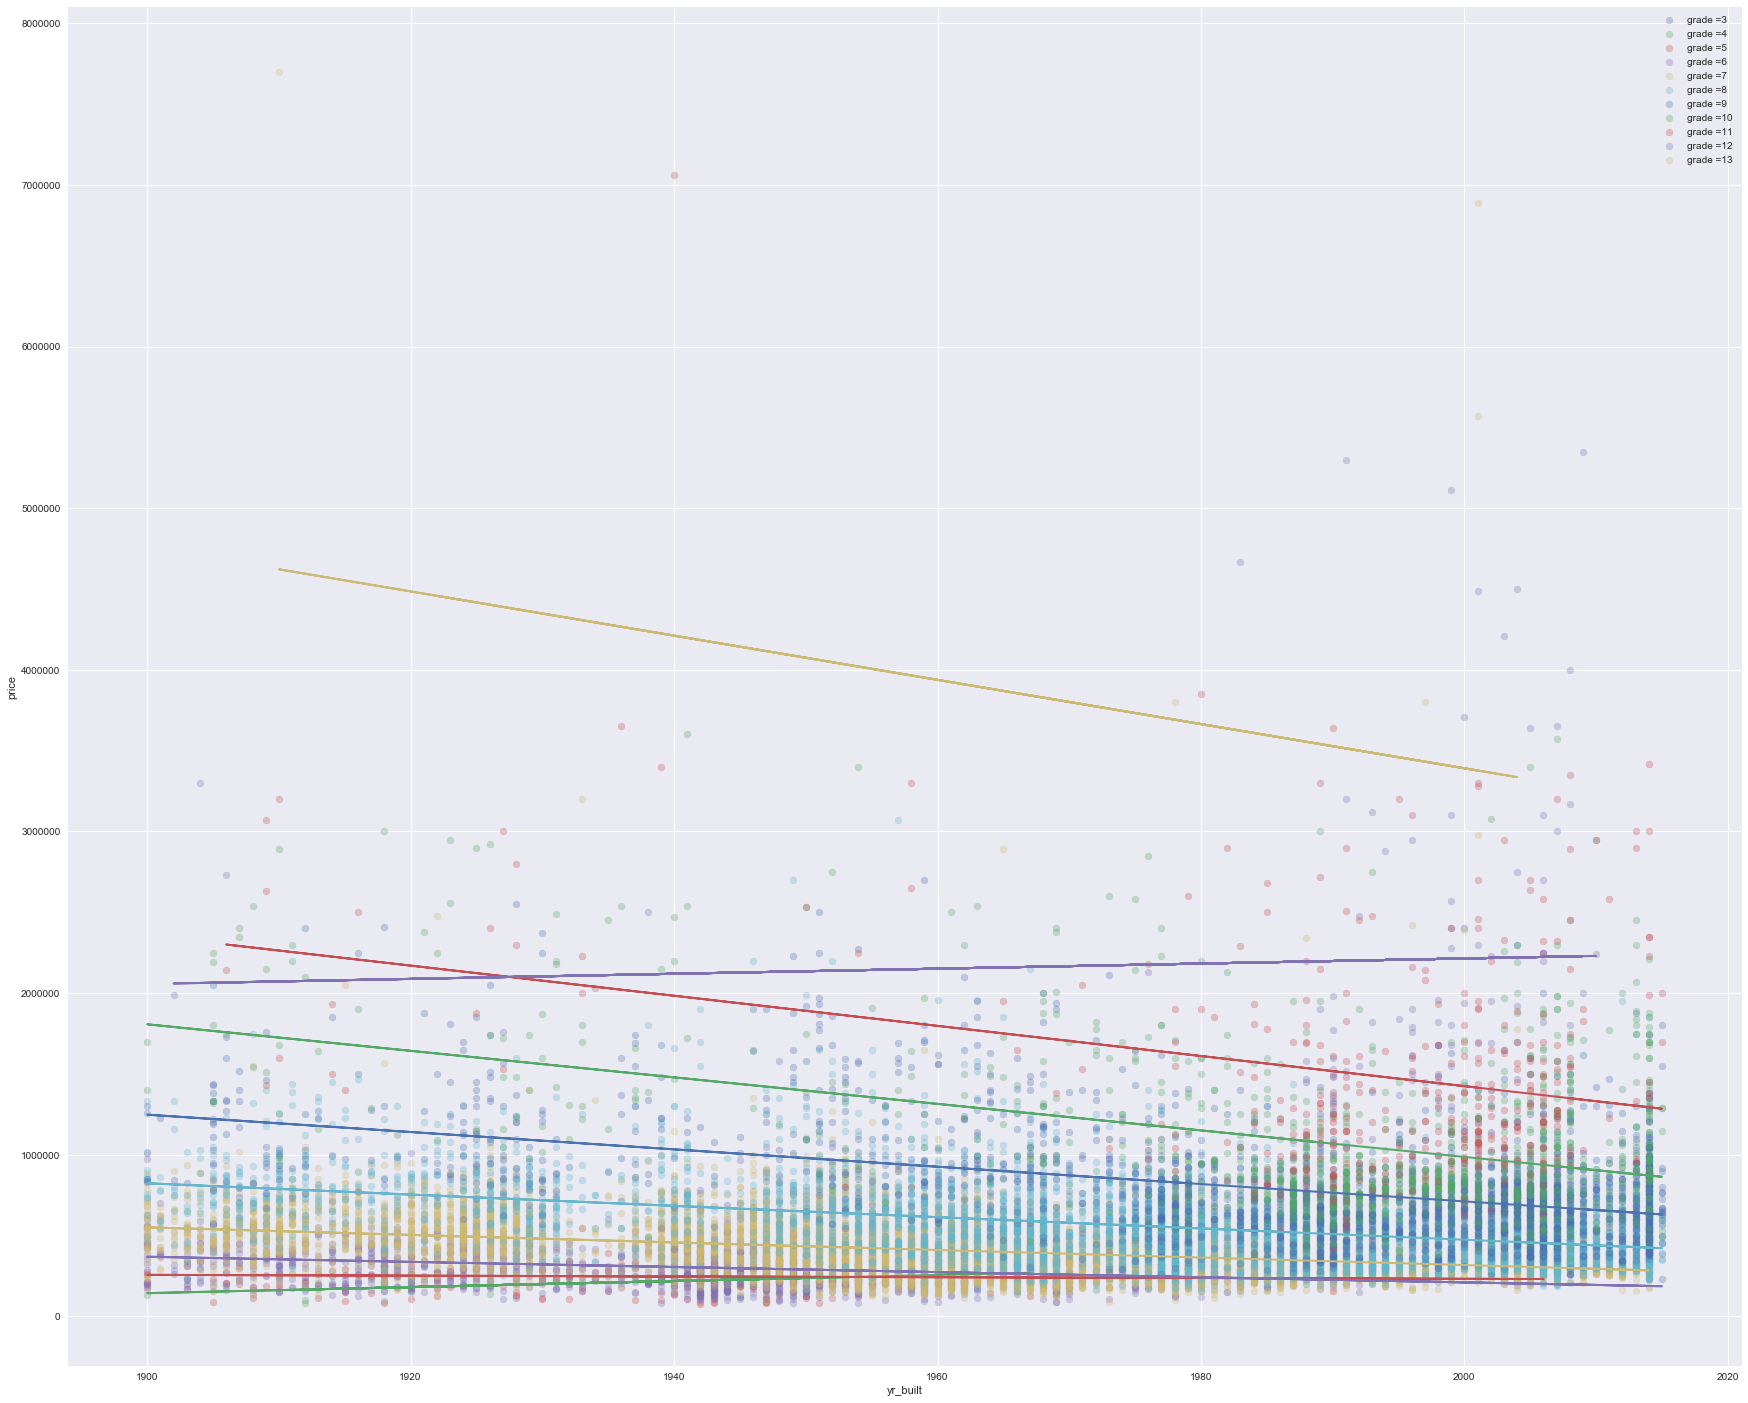

In [97]:
plot_function(uniquenames)

From the above graph ,there is an interaction between the 'grade' and 'yr_built'

In [98]:
#selecting the 'yr_built and 'yr_renovated' column from the dataframe 
df6 = df[['yr_built', 'yr_renovated']]

In [99]:
# concatinating yr_built and 'yr_renovated' to the current dataframe
df7 = pd.concat([df4, df6], axis = 1)

In [100]:
# splitting the date for train and test set
X = df7.drop('price_log', axis = 1)
y = df7['price_log']

In [101]:
# applying interactions to 'yr_built and 'grade' by multiplying them
X_interact_2 = X.copy()
X_interact_2['grade_year'] = X['yr_built'] * X['grade']




In [102]:
X_interact_2

,sqft_above_log,sqft_living_log,sqft_living15_log,grade,view,bathrooms,yr_built,yr_renovated,grade_year
0,7.073270,7.073270,7.200425,7,0.0,1.00,1955,0.0,13685
1,7.682482,7.851661,7.432484,7,0.0,2.25,1951,1991.0,13657
2,6.646391,6.646391,7.908387,6,0.0,1.00,1933,0.0,11598
3,6.956545,7.580700,7.215240,7,0.0,3.00,1965,0.0,13755
4,7.426549,7.426549,7.495542,8,0.0,2.00,1987,0.0,15896
...,...,...,...,...,...,...,...,...,...
21592,7.333023,7.333023,7.333023,8,0.0,2.50,2009,0.0,16072
21593,7.745003,7.745003,7.512071,8,0.0,2.50,2014,0.0,16112
21594,6.927558,6.927558,6.927558,7,0.0,0.75,2009,0.0,14063
21595,7.377759,7.377759,7.251345,8,0.0,2.50,2004,0.0,16032


In [103]:
# splitting data for train and test 
X = X_interact_2
y = df7['price_log']

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

Train RMSE: 0.3132980216188752
Test RMSE: 0.3193145255976609
Train R2: 0.647085067318093
Test R2: 0.6286563030309209


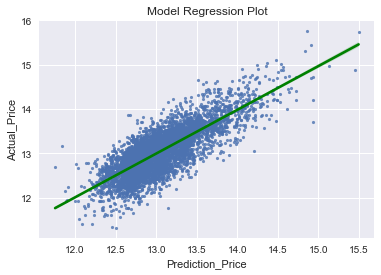

In [105]:
linear_model(X_train, y_train, X_test, y_test)

Comparing our model with the baseline model

**Model 5**:
* **Train RMSE**: 0.3513999392706709
* **Test RMSE**: 0.35286466512965453
* **Train R2**: 0.5560254312136382
* **Test R2**: 0.5465232245990275


**Model 6**:
* **Train RMSE**: 0.3132980216188752
* **Test RMSE**: 0.3193145255976609
* **Train R2**: 0.647085067318093
* **Test R2**: 0.6286563030309209

Our new model looks better in terms of both R2 value and RMSE value.

Let us futher check for any interactions in our data

In [106]:
X = df7.drop('price_log', axis = 1)
y = df7['price_log']
baseline = 0.5560254312136382

In [107]:
# Function to check for interaction in our dataset
from itertools import combinations
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
interactions = []
# Combination function for the X values
feat_combinations = combinations(X.columns, 2)
regression = LinearRegression()
crossvalidation = KFold(n_splits = 3, shuffle=True, random_state = 1)
# duplicate of X dataframe
data_3 = X.copy()
# Applying interaction term for each combinations
for i, (a, b) in enumerate(feat_combinations):
    data_3['interaction'] = data_3[a] * data_3[b]
    score = np.mean(cross_val_score(regression, data_3, y, scoring = 'r2', cv = crossvalidation))
    if score > baseline:
        interactions.append((a, b, round(score, 3)))
    
    if i % 50 == 0:
        print(i)
            
print('Top 3 interactions: %s' %sorted(interactions, key = lambda inter: inter[2], reverse = True)[:3])

0
Top 3 interactions: [('sqft_living15_log', 'yr_built', 0.645), ('sqft_living15_log', 'grade', 0.644), ('sqft_above_log', 'sqft_living_log', 0.643)]


In [108]:
# Define 'tiers' of sqft
sqft = np.asarray(df7[['sqft_living_log']]).reshape(len(df7[['sqft_living_log']]))
high_sqft = df7[sqft > np.percentile(sqft, 67)]
med_sqft = df7[(sqft > np.percentile(sqft, 33)) & (sqft <= np.percentile(sqft, 67))]
low_sqft = df7[sqft <= np.percentile(sqft, 33)]

In [109]:
high_sqft = df7[sqft > np.percentile(sqft, 67)]
med_sqft = df7[(sqft > np.percentile(sqft, 33)) & (sqft <= np.percentile(sqft, 67))]
low_sqft = df7[sqft <= np.percentile(sqft, 33)]

In [110]:
regression_1 = LinearRegression()
regression_2 = LinearRegression()
regression_3 = LinearRegression()

yr_built1 = high_sqft['yr_built'].values.reshape(-1, 1)
yr_built2 = med_sqft['yr_built'].values.reshape(-1, 1)
yr_built3 = low_sqft['yr_built'].values.reshape(-1, 1)

regression_1.fit(yr_built1, high_sqft['price_log'])
regression_2.fit(yr_built2, med_sqft['price_log'])
regression_3.fit(yr_built3, low_sqft['price_log'])

# Make predictions using the testing set
pred_1 = regression_1.predict(yr_built1)
pred_2 = regression_2.predict(yr_built2)
pred_3 = regression_3.predict(yr_built3)

# The coefficients
print(regression_1.coef_)
print(regression_2.coef_)
print(regression_3.coef_)

[-0.00203552]
[-0.00328888]
[-0.0006947]


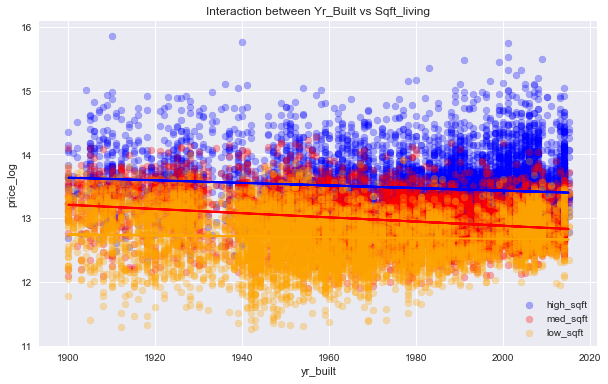

In [111]:
# Plot outputs
plt.figure(figsize = (10, 6))

plt.scatter(yr_built1, high_sqft['price_log'],  color = 'blue', alpha = 0.3, label = 'high_sqft')
plt.scatter(yr_built2, med_sqft['price_log'],  color = 'red', alpha = 0.3, label = 'med_sqft')
plt.scatter(yr_built3, low_sqft['price_log'],  color = 'orange', alpha = 0.3, label = 'low_sqft')

plt.plot(yr_built1, pred_1, color = 'blue', linewidth = 2)
plt.plot(yr_built2, pred_2, color = 'red', linewidth = 2)
plt.plot(yr_built3, pred_3, color = 'orange', linewidth = 2)
plt.ylabel('price_log')
plt.xlabel('yr_built')
plt.title('Interaction between Yr_Built vs Sqft_living')
plt.legend();

So the graph doesn't show any interactions between the variables. Comparing all the models, Model 6 has given a satisfactory result and hence I am considering Model 6 as my final model.

Checking our final model for the Linear Regression Assumptions

In [112]:
# splitting data for train and test 
X = X_interact_2
y = df7['price_log']

In [113]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [114]:
# scaling our train and test data
scaler=StandardScaler()
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [115]:
# Initializing regression for our final model
linreg6=LinearRegression()

In [116]:
# fitting our model
linreg6.fit(X_train_scaled,y_train)

LinearRegression()

In [117]:
# predicting our model value
train_pred=linreg6.predict(X_train_scaled)
test_pred=linreg6.predict(X_test_scaled)

In [118]:
residuals_train=y_train - train_pred
residuals_test=y_test - test_pred

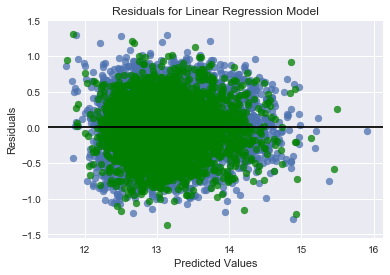

In [119]:
plt.scatter(train_pred, residuals_train, alpha=.75)
plt.scatter(test_pred, residuals_test, color='g', alpha=.75)
plt.axhline(y=0, color='black')
plt.title('Residuals for Linear Regression Model')
plt.ylabel('Residuals')
plt.xlabel('Predicted Values')
plt.show()

From the above residual plot, our final model is Homoscedastic

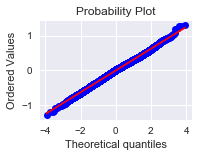

In [120]:
ax1 = plt.subplot(221)
res = stats.probplot(residuals_train, plot=plt)

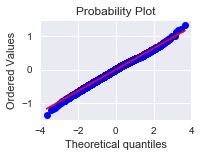

In [121]:
ax1 = plt.subplot(221)
res = stats.probplot(residuals_test, plot=plt)

From the above probplot, our model is normally distributed

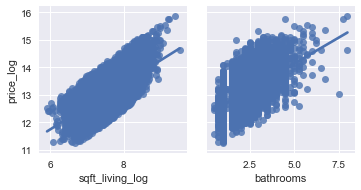

In [122]:
sns.pairplot(df7, x_vars = ['sqft_living_log', 'bathrooms'], y_vars = 'price_log', kind = 'reg');

From the above pairplot, our model shows a linear relationship between the target variables(price) and response variables(sqft_living and bathrooms)

,sqft_above_log,sqft_living_log,sqft_living15_log,price_log,grade,view,bathrooms,yr_built,yr_renovated
sqft_above_log,1.000000,0.864979,0.713102,0.586013,0.742869,0.157019,0.695839,0.451397,0.023434
sqft_living_log,0.864979,1.000000,0.746836,0.674802,0.743038,0.244804,0.762135,0.349689,0.047366
sqft_living15_log,0.713102,0.746836,1.000000,0.607154,0.689054,0.262556,0.571796,0.333819,0.002211
price_log,0.586013,0.674802,0.607154,1.000000,0.703720,0.344653,0.551249,0.080583,0.106867
grade,0.742869,0.743038,0.689054,0.703720,1.000000,0.249082,0.665838,0.447865,0.015623
view,0.157019,0.244804,0.262556,0.344653,0.249082,1.000000,0.186016,0.054452,0.090339
bathrooms,0.695839,0.762135,0.571796,0.551249,0.665838,0.186016,1.000000,0.507173,0.047177
yr_built,0.451397,0.349689,0.333819,0.080583,0.447865,0.054452,0.507173,1.000000,0.202555
yr_renovated,0.023434,0.047366,0.002211,0.106867,0.015623,0.090339,0.047177,0.202555,1.000000


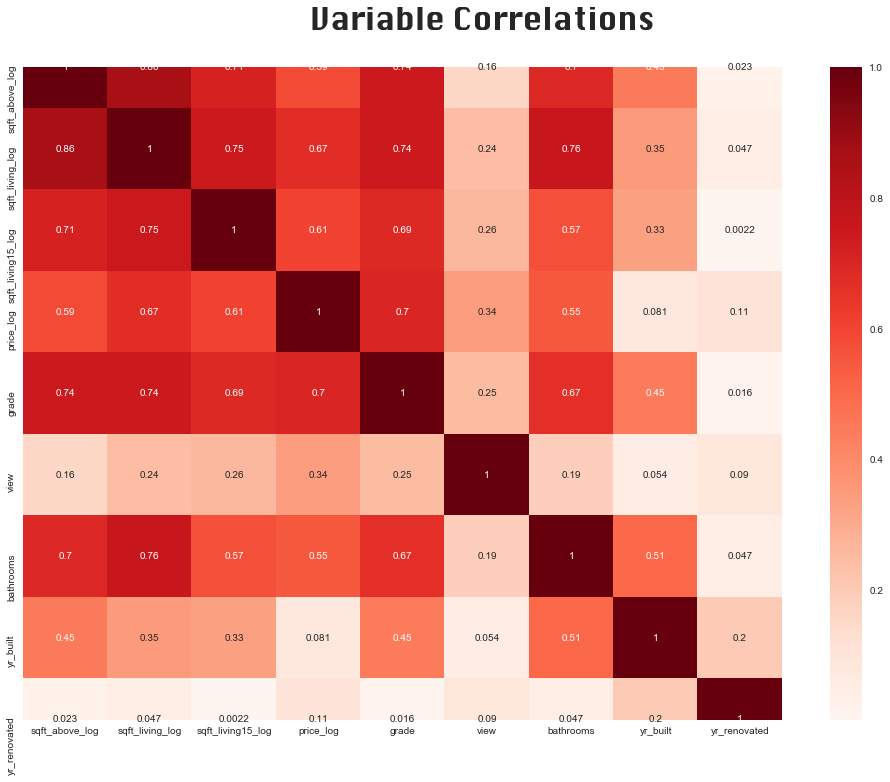

In [123]:
corr = df7.corr().abs()
fig, ax = plt.subplots(figsize = (17, 12))
fig.suptitle('Variable Correlations', fontsize = 30, y = .95, fontname = 'Silom')
heatmap = sns.heatmap(corr, cmap = 'Reds', annot = True)
corr

From the above heat map, our model is having a multicollinearity between the varibales

## Interpret

Now let us check our coefficient for model interpretation

In [124]:
# dictionary for our model coefficient values
dict(zip(X.columns, linreg6.coef_))

{'sqft_above_log': -0.021770055297525837,
 'sqft_living_log': 0.10892603292839172,
 'sqft_living15_log': 0.06681428281492817,
 'grade': -0.32348332202041746,
 'view': 0.04967993185827171,
 'bathrooms': 0.08242836295741171,
 'yr_built': -0.22420941567862027,
 'yr_renovated': 0.005777342119279377,
 'grade_year': 0.6174644154354602}

In [125]:
# fitting the model and predicting the coefficient values
params = np.append(linreg6.intercept_, linreg6.coef_)
predictions = linreg6.predict(X_train_scaled)
# creating a dataframe to add our X and add new column 'constant' with value 1
newX = pd.DataFrame({"Constant":np.ones(len(X))}).join(pd.DataFrame(X))
# Caculating MSE 
MSE = (sum((y_train-predictions)**2)) / (len(newX)-len(newX.columns))
# Applying MSE to all X values
var_b = MSE * (np.linalg.inv(np.dot(newX.T, newX)).diagonal())
# Calculating standard errors
sd_b = np.sqrt(var_b)
#Caculating t_values
ts_b = params / sd_b

# Calculating p_values
p_values =[2 * (1 - stats.t.cdf(np.abs(i), (len(newX) - len(newX.columns) - 1))) for i in ts_b]
sd_b = np.round(sd_b, 3)
ts_b = np.round(ts_b, 3)
p_values = np.round(p_values, 3)
params = np.round(params, 4)


myDF3 = pd.DataFrame()
myDF3["Coefficients"], myDF3["Standard Errors"], myDF3["t values"], myDF3["Probabilities"] = [params, sd_b, ts_b, p_values]
print(myDF3)

   Coefficients  Standard Errors   t values  Probabilities
0       13.0498            0.849     15.363          0.000
1       -0.0218            0.010     -2.287          0.022
2        0.1089            0.011      9.984          0.000
3        0.0668            0.009      7.367          0.000
4       -0.3235            0.112     -2.884          0.004
5        0.0497            0.003     19.150          0.000
6        0.0824            0.004     19.989          0.000
7       -0.2242            0.000   -521.373          0.000
8        0.0058            0.000   1088.385          0.000
9        0.6175            0.000  10885.872          0.000


**Model coefficients:**

**sqft_above_log:** -0.021770055297525837\
**sqft_living_log:** 0.10892603292839172\
**sqft_living15_log:** 0.06681428281492817\
**grade:** -0.32348332202041746\
**view:** 0.04967993185827171\
**bathrooms:** 0.08242836295741171\
**yr_built:** -0.22420941567862027\
**yr_renovated:** 0.005777342119279377\
**grade_year:** 0.6174644154354602

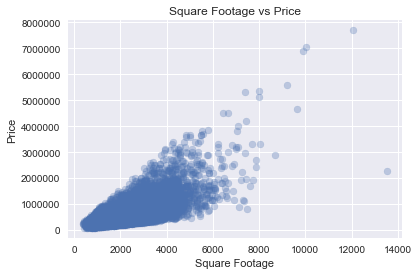

In [126]:
plt.scatter(x = df['sqft_living'], y = df['price'], alpha = 0.3)
plt.xlabel("Square Footage")
plt.ylabel("Price")
plt.title("Square Footage vs Price")
plt.savefig("./images/sqft.png", dpi=300, bbox_inches = 'tight')


The most distinctive feature is the square footage where the larger house will be more expensive. It is noticeable that the graph is getting broader as the square foot increases.

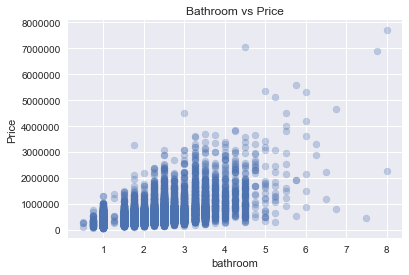

In [127]:
plt.scatter(x = df['bathrooms'], y = df['price'], alpha = 0.3, label = 'Data Points')
plt.xlabel("bathroom")
plt.ylabel("Price")
plt.title("Bathroom vs Price")
plt.savefig("./images/bathroom.png", dpi=300, bbox_inches = 'tight')


From the graph, it is clear that as the number of bathrooms increases, the house price increases.

Among the 9 features, the model interpretation is done for 2 parameters.
* Square Footage Living
* Bathroom

The coefficient p_value of our target and response variable is 0. So they are statistically significant. The target variable (price) and the response variable 'sqft_living' and 'bathrooms' are log transformed.

Coefficient of 'Sqft-living' is 0.108.  Hence for  every 1% increase of sqft_living,price increase by 0.11%.\
Therefore for every 0.11% increase in sqft_living,our price increase by (1.11^0.11-1)*100=1.15% .\
Similarly for every 0.08% increase in bathroom ,our price increase by (1.08^0.08-1)*100=0.61%


## Conclusion:

The Model 6 has given the satisfactory result and hence considering it has a final model.

Train RMSE: 0.3132980216188752\
Test RMSE: 0.3193145255976609\
Train R2: 0.647085067318093\
Test R2: 0.6286563030309209

* The model RMSE for the train and test set are some what similar which indicates that our model will perform well on different data
* The model R2 value is 0.647 which is 64% of price variation is explained by our model
* Based on the RMSE value, our model's prediction on an average is off by 31% from the actual price value

Since the model is log transformed , our interpretation cannot be done in USD as it is unit free

## Recommendations:

If you are looking for housing that won't make your bank account fragile, then go for the housing with minimal bathroom so that you could share them and it's advisable to shrink on squarefootage that would make our house purchase a very cost effective one.

## Next Step:

The model does have some limitations to satisfy regression assumptions.
* Our model has a multicollinear relationship between the variables. Hence futher processing needs to be done on removing the multicollinearity 
* Our interaction graph shows that there are houses with higher grade having lesser price value. It could be of the geographical locations of whether the houses are located in the heart of the city or away from it. So futher analysis and investigations needs to be done on those criteria using the zipcode.
* This model have not handled any outliers. Future work involves handling those outliers and check the model prediction on removing outliers.

## For More Information:

See the full analysis in the Jupyter Notebook or review this presentation.

For additional info,contact Janaki @janakipurushothamman@gmail.com